In [15]:
from split_data import split
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [2]:
source_path = "../Data/Original/Apple"
training_path = "../train_data/"
testing_path = "../test_data/"
train_test_ratio = 0.7
split(source_path, training_path, testing_path, train_test_ratio)

Finish splitting Apple___Cedar_apple_rust
[Training Samples:192, Testing Samples:83]   Original Samples:275
---------------------
Finish splitting Apple___Apple_scab
[Training Samples:441, Testing Samples:189]   Original Samples:630
---------------------
Finish splitting Apple___Black_rot
[Training Samples:435, Testing Samples:186]   Original Samples:621
---------------------
Finish splitting Apple___healthy
[Training Samples:1151, Testing Samples:494]   Original Samples:1645
---------------------
Total Training Samples: 2219, Testing Samples: 952, Total Samples: 3171


In [5]:
train_data = ImageFolder(training_path, transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

test_data = ImageFolder(testing_path,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

Label : Apple___Apple_scab


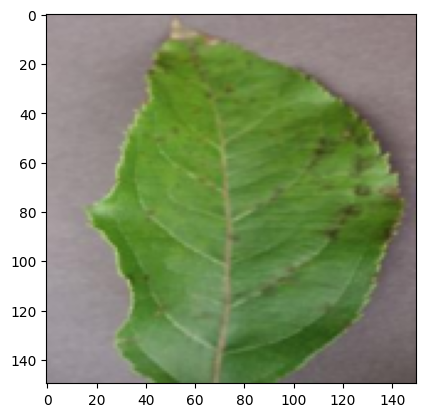

In [19]:
def display_img(img,label):
    print(f"Label : {train_data.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*train_data[0])